### Neural Network Model to train on Semantic distances between title and body/prose segments

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Lab_dom_dep_train_data.csv')

In [3]:
# Stats of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38546 entries, 0 to 38545
Data columns (total 4 columns):
Header_Distance    38546 non-null float64
Body_Distance      38546 non-null float64
Length             38546 non-null int64
Label              38546 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


In [4]:
df.head()

,Header_Distance,Body_Distance,Length,Label
0,0.000000,-8.462631,6,2
1,-4.936535,-28.999250,17,2
2,0.000000,0.000000,4,2
3,0.000000,0.000000,7,2
4,0.000000,0.000000,7,2


In [5]:
df.describe()

,Header_Distance,Body_Distance,Length,Label
count,38546.000000,38546.000000,38546.000000,38546.000000
mean,-39.069120,-63.889317,87.341670,1.553183
std,106.734223,167.961652,223.709508,0.654935
min,-5392.145508,-8156.689941,3.000000,0.000000
25%,-19.120090,-33.267109,9.000000,1.000000
50%,-4.231316,-9.873070,17.000000,2.000000
75%,0.000000,0.000000,46.000000,2.000000
max,0.000000,0.000000,9927.000000,2.000000


In [6]:
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B970F0C18>]], dtype=object)

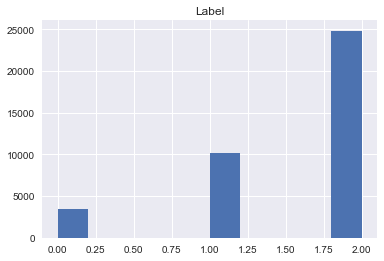

In [7]:
df.hist(column='Label')

In [9]:
X = df[['Header_Distance','Body_Distance','Length']]
y = df['Label']

In [26]:
# import python tensorflow
import tensorflow as tf
from tensorflow.contrib.learn import SKCompat

In [27]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=3)]

In [28]:
classifer_qq = SKCompat(tf.contrib.learn.DNNClassifier(hidden_units=[24,48],
                                           feature_columns=feature_columns,
                                           n_classes=3,model_dir='./tf_model/'
                                          ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002575B9A3A20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './tf_model/'}


In [29]:
classifer_qq.fit(X,y,steps=2000,batch_size=256)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./tf_model/model.ckpt.
INFO:tensorflow:loss = 19.0013, step = 1
INFO:tensorflow:global_step/sec: 206.918
INFO:tensorflow:loss = 0.762444, step = 101 (0.486 sec)
INFO:tensorflow:global_step/sec: 214.022
INFO:tensorflow:loss = 1.55348, step = 201 (0.466 sec)
INFO:tensorflow:global_step/sec: 213.564
INFO:tensorflow:loss = 0.710124, step = 301 (0.467 sec)
INFO:tensorflow:global_step/sec: 218.237
INFO:tensorflow:loss = 0.66276, step = 401 (0.459 sec)
INFO:tensorflow:global_step/sec: 215.875
INFO:tensorflow:loss = 0.619779, step = 501 (0.462 sec)
INFO:tensorflow:global_step/sec: 217.286
INFO:tensorflow:loss = 0.721031, step = 601 (0.461 sec)
INFO:tensorflow:global_step/sec: 209.525
INFO:tensorflow:loss = 0.55749, step = 701 (0.475 sec)
INFO:tensorflow:global_step/sec: 212.653
INFO:tensorflow:loss = 0.656736, step = 801 (0.472 sec)
INFO:tensorflow:global_step/sec: 215.875
INFO:tensorflow:loss = 0.598093,

SKCompat()